<a href="https://colab.research.google.com/github/yeesem/Soft-Computing/blob/main/Tutorial_5_Neural_Network_in_Tensorflow_and_Pytouch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from sklearn.metrics import classification_report

In [2]:
# Set global parameters
num_epochs = 10
learning_rate = 0.001

# Load dataset
fmnist = tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test) = fmnist.load_data()

# Normalize the pixel value of images
x_train = x_train / 255.0
x_test = x_test / 255.0

4422102/4422102 [==============================] - 1s 0us/step


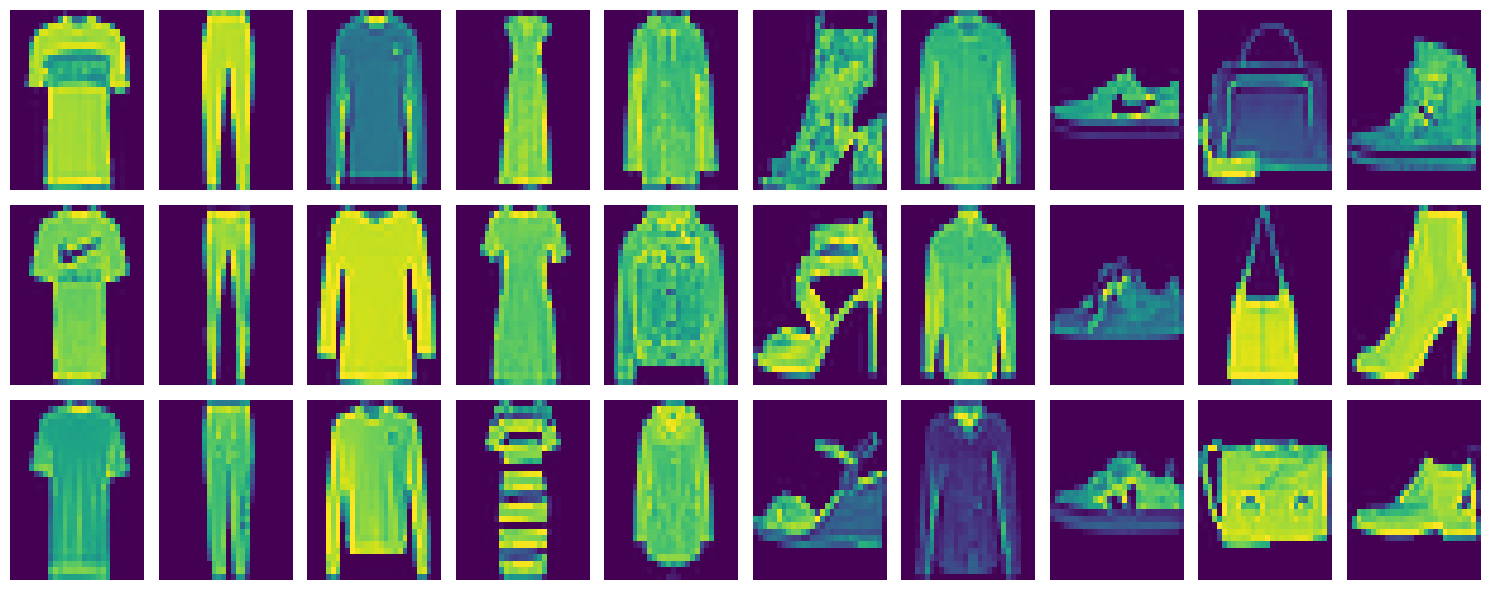

In [3]:
# Number of examples to show per class
examples_per_class = 3
number_of_classes = np.unique(y_train)

fig,axes = plt.subplots(nrows = examples_per_class,ncols = len(number_of_classes), figsize = (15,6))

for i, cls in enumerate(number_of_classes):
  # Find the indices of images of class i
  # np.flatnonzero = Get the indices of non-zero elements in the flattened array
  idxs = np.flatnonzero(y_train == i)
  idxs = np.random.choice(idxs,examples_per_class,replace = False)
  for j in range(examples_per_class):
    # Plot each example
    ax = axes[j][i]
    ax.imshow(x_train[idxs[j]],aspect = 'auto')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation = 'relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10,activation = 'softmax')
])

model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate =learning_rate),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 128)               1

In [5]:
history = model.fit(
    x_train,
    y_train,
    epochs = num_epochs,
    validation_data = (x_test,y_test),
    # The number of processes to use for data preprocessing during training.
    workers = 4 # Run parallelly
)

Epoch 1/10
1875/1875 [==============================] - 23s 7ms/step - loss: 0.5241 - accuracy: 0.8073 - val_loss: 0.4026 - val_accuracy: 0.8492
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3477 - accuracy: 0.8730 - val_loss: 0.3282 - val_accuracy: 0.8803
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3025 - accuracy: 0.8900 - val_loss: 0.3077 - val_accuracy: 0.8899
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2761 - accuracy: 0.8984 - val_loss: 0.2802 - val_accuracy: 0.8996
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2521 - accuracy: 0.9073 - val_loss: 0.2729 - val_accuracy: 0.9001
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2368 - accuracy: 0.9118 - val_loss: 0.2813 - val_accuracy: 0.8990
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2202 - accuracy: 0.9167 - val_loss: 0.2670 - val_acc

<Figure size 640x480 with 0 Axes>

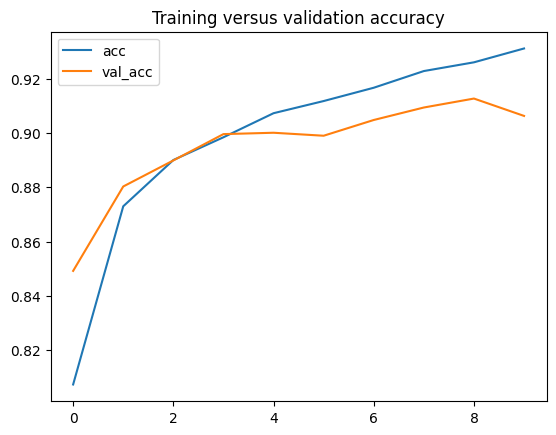

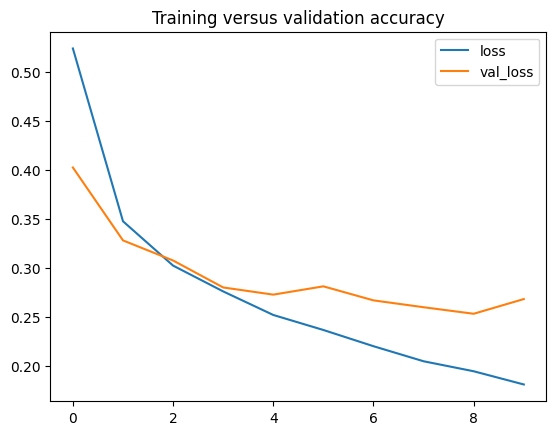

<Figure size 640x480 with 0 Axes>

In [6]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot training and validation accuracy per epoch
plt.plot(range(num_epochs),acc,label = 'acc')
plt.plot(range(num_epochs),val_acc,label = 'val_acc')
plt.title('Training versus validation accuracy')
plt.legend()
plt.figure()

# Plot training and validation loss per epoch
plt.plot(range(num_epochs),loss,label = 'loss')
plt.plot(range(num_epochs),val_loss,label = 'val_loss')
plt.title('Training versus validation accuracy')
plt.legend()
plt.figure()

In [7]:
predictions  = model(x_test)
predictions = predictions.numpy()
predictions_labels = np.argmax(predictions,axis = 1)

In [8]:
rep = classification_report(y_test,predictions_labels)
print(rep)

              precision    recall  f1-score   support

           0       0.80      0.92      0.86      1000
           1       1.00      0.98      0.99      1000
           2       0.83      0.89      0.86      1000
           3       0.92      0.91      0.91      1000
           4       0.81      0.90      0.85      1000
           5       0.97      0.98      0.98      1000
           6       0.83      0.59      0.69      1000
           7       0.96      0.96      0.96      1000
           8       0.98      0.97      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.90     10000
weighted avg       0.91      0.91      0.90     10000



In [10]:
# Pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

In [58]:
class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    self.conv1 = nn.Conv2d(in_channels = 3,out_channels = 32, kernel_size = 3,padding = 1)
    self.conv2 = nn.Conv2d(in_channels = 32,out_channels = 64,kernel_size = 3,padding = 1)
    self.pool = nn.MaxPool2d(kernel_size = 2,stride = 2)
    self.dropout1 = nn.Dropout(0.25)
    self.fc1 = nn.Linear(in_features = 49 * 16 * 16,out_features = 128)
    self.dropout2 = nn.Dropout(0.5)
    self.fc2 = nn.Linear(in_features = 128,out_features = 10)

  def forward(self,x):
    x = F.relu(self.conv1(x))
    x = F.relu(self.conv2(x))
    x = self.pool(x)
    x = self.dropout1(x)
    x = x.view(-1, 64 * 14 * 14)
    x = F.relu(self.fc1(x))
    x = self.dropout2(x)
    x = self.fc2(x)
    return x

In [59]:
model_pytorch = Net()

In [60]:
model_pytorch

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout(p=0.25, inplace=False)
  (fc1): Linear(in_features=12544, out_features=128, bias=True)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [61]:
# Pytorch uses their own dataloader for datasets
transform = transforms.Compose(
    [
        transforms.Grayscale(num_output_channels=3),
        transforms.ToTensor(),
        # Normalise with ImageNet mena and std
        transforms.Normalize(mean = [0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]
)

trainset = torchvision.datasets.FashionMNIST(root = './data',train = True,
                                             download = True,transform = transform)

trainloader = torch.utils.data.DataLoader(trainset,batch_size = 64,
                                          shuffle = False)

testset = torchvision.datasets.FashionMNIST(root = './data',train = False,
                                             download = True,transform = transform)

testloader = torch.utils.data.DataLoader(testset,batch_size = 64,
                                         shuffle = False)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_pytorch.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_pytorch.parameters(),lr = learning_rate)

In [62]:
for epoch in range(num_epochs):
  print("Training for epoch {}/{} ...".format(epoch+1,num_epochs))
  running_loss = 0.0
  for i , data in enumerate(trainloader,0):
    inputs,labels = data[0].to(device),data[1].to(device)

    optimizer.zero_grad()

    outputs = model_pytorch(inputs)
    loss = criterion(outputs,labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()

print('Finished Training')

Training for epoch 1/10 ...
Training for epoch 2/10 ...
Training for epoch 3/10 ...
Training for epoch 4/10 ...
Training for epoch 5/10 ...
Training for epoch 6/10 ...
Training for epoch 7/10 ...
Training for epoch 8/10 ...
Training for epoch 9/10 ...
Training for epoch 10/10 ...
Finished Training


In [68]:
list_predictions = []
list_labels = []

with torch.no_grad():
  for data in testloader:
    images,labels = data[0].to(device),data[1].to(device)
    outputs = model_pytorch(images)
    _,predicted = torch.max(outputs.data,1)

    list_labels += [labels]
    list_predictions += [predicted]

In [75]:
list_labels = torch.cat(list_labels).cpu().numpy()
list_predictions = torch.cat(list_predictions).cpu().numpy()

In [76]:
rep = classification_report(list_labels,list_predictions)
print(rep)

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1000
           1       0.99      0.97      0.98      1000
           2       0.84      0.87      0.86      1000
           3       0.90      0.91      0.90      1000
           4       0.84      0.87      0.85      1000
           5       0.98      0.98      0.98      1000
           6       0.79      0.70      0.74      1000
           7       0.96      0.95      0.96      1000
           8       0.99      0.97      0.98      1000
           9       0.95      0.98      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

